In [1]:
import pyarrow.parquet as pq
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
print('Doing startup junk')
df: pd.DataFrame = pq.read_table('fuller_data.parquet').to_pandas()
df.sort_values(by='anum', inplace=True)
ndf = df.to_numpy()

Doing startup junk


In [39]:
# Creating Graph
G = nx.DiGraph()

_last_anum = 0
for index, row in enumerate(ndf):
    country, poe, anum = row[2], row[3], row[16]
    if not isinstance(anum, int) or anum < 0:
        continue
    G.add_edge(_last_anum, anum, weight=0.1)
    if poe != '':
        G.add_edge(anum, poe, weight=1)
    _last_anum = anum
    
    if index == 10:
        break

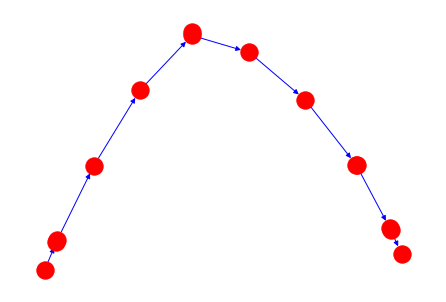

In [40]:
nx.draw_spectral(G, node_color='r', edge_color='b')

In [41]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
print(list(filter(lambda x: len(x) >= 5, next(communities_generator))))

[{0, 'New York, New York', 172298, 366961, 'WASHINGTON DC', 365047, 364376}, {367264, 367233, 564226, 900195, 'NEW YORK, NY (IA)', 898379, 'Unknown'}]
